# Решение Задачи "Разработка нефтегазовых месторождений"

Набор данных содержит 442 о различных нефтегазовых месторождениях.
Тренировочный набор - 309 строк.
Тестовый набор - 133 строк.

Каждое месторождение обладает 19 параметрами:
1. Field name - название месторождения
2. Reservoir unit - юнит месторождения
3. Country - страна расположения
4. Region - регион расположения
5. Basin name - название бассейна пород
6. Tectonic regime - тектонический режим
7. Latitude - широта
8. Longitude - долгота
9. Operator company - название компании
10. Onshore or oﬀshore - на суше или нет
11. Hydrocarbon type (main) - тип углеводорода
12. Reservoir status (current) - статус месторождения
13. Structural setting - структурные свойства
14. Depth (top reservoir ft TVD) - глубина
15. Reservoir period - литологический период
16. Lithology (main) - литология
17. Thickness (gross average ft) - общая толщина
18. Thickness (net pay average ft) - эффективная толщина
19. Porosity (matrix average 20. Permeability (air average mD) – проницаемость

## Считывание данных

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/competitions/classification-of-oil-and-gas-fields'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  elenami15


Your Kaggle Key:

  ········


100%|██████████| 24.4k/24.4k [00:00<00:00, 320kB/s]


Extracting archive .\classification-of-oil-and-gas-fields/classification-of-oil-and-gas-fields.zip to .\classification-of-oil-and-gas-fields


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Считываем тренировочные данные
train = pd.read_csv("train_oil.csv")
test = pd.read_csv("oil_test.csv")

print(f"Train dataset shape: {train.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (309, 20)
Test dataset shape: (133, 19)


## Исследование и обработка данных

In [ ]:
# Посмотрим как выглядят данные
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

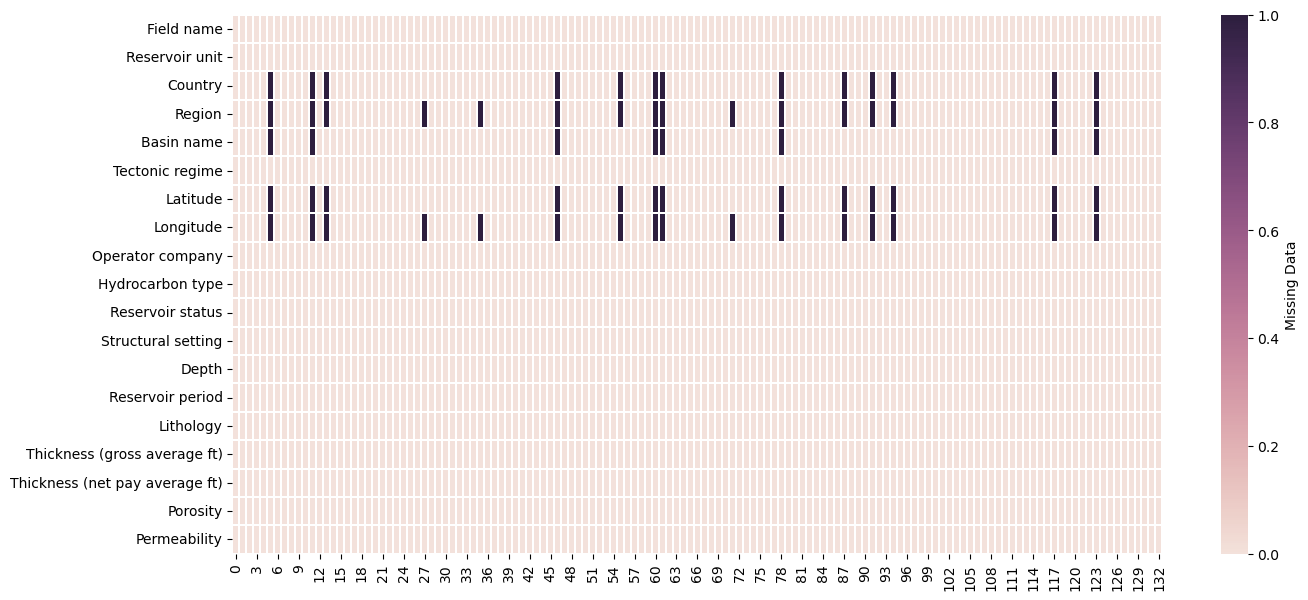

In [ ]:
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(test.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

C:\Users\user\AppData\Local\Temp\ipykernel_15308\1991361944.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Onshore/Offshore', data = train, palette='hls')


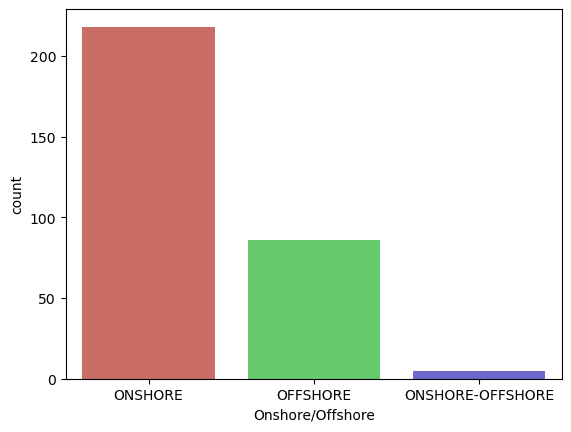

In [ ]:
sns.countplot(x ='Onshore/Offshore', data = train, palette='hls')
plt.show()

Мы видим много пропусков в данных и много категориальных признаков. Также мы видим, что классы неравны, при этом класс ONSHORE преобладает. Модель может быть смещена в сторону преобладающего класса. Если не предпринять меры, алгоритм может чаще предсказывать ONSHORE, игнорируя другие классы, поэтому необходимы методы балансировки.

In [ ]:
total_nan = train.isnull().sum().sum()
print(f"Общее количество NaN: {total_nan}")

Общее количество NaN: 160


Удалим пропуски, т.к. пропусков относительно немного.

In [ ]:
print(train.shape)
train = train.dropna()
print(train.shape)

(309, 20)
(268, 20)


In [ ]:
total_nan = train.isnull().sum().sum()
print(f"Общее количество NaN: {total_nan}")

Общее количество NaN: 0


### Обработка категориальных признаков

Посмотрим по порядку на категориальные столбцы и преобразуем их в числовой формат.

In [ ]:
train['Tectonic regime'].value_counts()

Tectonic regime
COMPRESSION                                                 57
EXTENSION                                                   26
COMPRESSION/EROSION                                         25
COMPRESSION/EVAPORITE                                       18
INVERSION/COMPRESSION/EXTENSION                             17
EXTENSION/EROSION                                           12
GRAVITY/EXTENSION/EVAPORITE                                 10
COMPRESSION/EVAPORITE/EXTENSION/LINKED                       7
GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION                 7
INVERSION/COMPRESSION/EXTENSION/EROSION                      7
INVERSION/STRIKE-SLIP/TRANSPRESSION/EXTENSION/BASEMENT-I     5
COMPRESSION/EXTENSION/LINKED                                 4
GRAVITY/EVAPORITE/COMPRESSION                                4
INVERSION/COMPRESSION/EXTENSION/EVAPORITE                    4
GRAVITY/EVAPORITE/EXTENSION                                  4
EXTENSION/EVAPORITE/EROSION/GRAVITY    

Так как в колонках есть повторения (названия разделены символом /), разделим такого рода признаки с помощью get_dummies.

In [ ]:
dummies_tec_reg = train['Tectonic regime'].str.get_dummies(sep='/')
dummies_tec_reg = dummies_tec_reg.add_prefix('Tectonic_regime_')

train = pd.concat([train, dummies_tec_reg], axis = 1)
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,...,Tectonic_regime_GRAVITY,Tectonic_regime_INVERSION,Tectonic_regime_LINKED,Tectonic_regime_REACTIVATION,Tectonic_regime_SHALE,Tectonic_regime_STRIKE-SLIP,Tectonic_regime_SYNSEDIMENTATION,Tectonic_regime_TRANSPRESSION,Tectonic_regime_TRANSTENSION,Tectonic_regime_UPLIFT
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,...,0,0,0,0,0,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,...,0,0,0,0,0,0,0,0,0,0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,...,0,0,0,0,0,0,0,0,0,0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,...,0,0,0,0,0,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,...,0,0,0,0,0,0,0,0,0,0


То же самое на тестовых данных.

In [ ]:
dummies_tec_reg = test['Tectonic regime'].str.get_dummies(sep='/')
dummies_tec_reg = dummies_tec_reg.add_prefix('Tectonic_regime_')

test = pd.concat([test, dummies_tec_reg], axis = 1)
test.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,...,Tectonic_regime_EXTENSION,Tectonic_regime_GRAVITY,Tectonic_regime_INVERSION,Tectonic_regime_LINKED,Tectonic_regime_SHALE,Tectonic_regime_STRIKE-SLIP,Tectonic_regime_SYNSEDIMENTATION,Tectonic_regime_TRANSPRESSION,Tectonic_regime_TRANSTENSION,Tectonic_regime_UPLIFT
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,...,1,0,0,0,0,0,0,0,0,0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,...,0,0,0,0,1,1,0,0,1,0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,...,0,0,0,0,0,0,0,0,0,0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,...,1,0,1,0,0,0,0,0,0,0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
train['Structural setting'].value_counts()

Structural setting
FORELAND                      67
RIFT                          43
INTRACRATONIC                 27
THRUST                        14
PASSIVE MARGIN                12
SALT/FORELAND                 11
SALT/PASSIVE MARGIN            9
INVERSION/RIFT                 7
DELTA/PASSIVE MARGIN           7
INVERSION/BACKARC              6
SALT/INVERSION/RIFT            5
DELTA/SALT/PASSIVE MARGIN      5
THRUST/FORELAND                4
SUB-THRUST/FORELAND            4
RIFT/SALT                      4
RIFT/INVERSION                 3
SUB-SALT/RIFT                  3
SUB-SALT/FORELAND              3
WRENCH                         3
BACKARC                        3
SALT/RIFT                      2
FORELAND/SALT                  2
FORELAND/THRUST                2
THRUST/SUB-THRUST/FORELAND     2
SUB-SALT/INVERSION             2
SUB-THRUST                     2
WRENCH/DELTA                   2
SUB-SALT                       1
INVERSION/FORELAND             1
RIFT/PASSIVE MARGIN     

In [ ]:
dummies_str_set = train['Structural setting'].str.get_dummies(sep='/')
dummies_str_set = dummies_str_set.add_prefix('Structural setting_')

train = pd.concat([train, dummies_str_set], axis = 1)
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,...,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE MARGIN,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,...,1,0,0,0,0,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,...,0,0,0,1,0,0,0,0,0,0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,...,1,0,0,0,0,0,0,0,0,0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,...,0,0,0,0,1,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
dummies_str_set = test['Structural setting'].str.get_dummies(sep='/')
dummies_str_set = dummies_str_set.add_prefix('Structural setting_')

test = pd.concat([test, dummies_str_set], axis = 1)
test.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,...,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE MARGIN,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,...,0,0,0,0,1,0,0,0,0,0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,...,0,0,0,0,0,0,0,0,0,1
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,...,1,0,0,0,0,0,1,0,0,0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,...,0,0,0,0,1,0,0,0,0,0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,...,0,0,0,0,1,0,0,0,0,1


Остальные категориальные признаки обработаем с помощью метода OrdinalEncoder.

In [ ]:
train = train.drop(columns=['Tectonic regime', 'Structural setting'])
test = test.drop(columns=['Tectonic regime', 'Structural setting'])

In [ ]:
means = ['Hydrocarbon type', 'Reservoir status', 'Lithology',
         'Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name', 'Operator company', 'Reservoir period']
ordinal_encoder = {}

for columns in means:
    ord_encod = OrdinalEncoder()
    train[[columns]] = ord_encod.fit_transform(train[[columns]])
    ordinal_encoder[columns] = ord_encod

ordinal_encoder

{'Hydrocarbon type': OrdinalEncoder(),
 'Reservoir status': OrdinalEncoder(),
 'Lithology': OrdinalEncoder(),
 'Field name': OrdinalEncoder(),
 'Reservoir unit': OrdinalEncoder(),
 'Country': OrdinalEncoder(),
 'Region': OrdinalEncoder(),
 'Basin name': OrdinalEncoder(),
 'Operator company': OrdinalEncoder(),
 'Reservoir period': OrdinalEncoder()}

In [ ]:
means = ['Hydrocarbon type', 'Reservoir status', 'Lithology',
         'Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name', 'Operator company', 'Reservoir period']
ordinal_encoder = {}

for columns in means:
    ord_encod = OrdinalEncoder()
    test[[columns]] = ord_encod.fit_transform(test[[columns]])
    ordinal_encoder[columns] = ord_encod

ordinal_encoder

{'Hydrocarbon type': OrdinalEncoder(),
 'Reservoir status': OrdinalEncoder(),
 'Lithology': OrdinalEncoder(),
 'Field name': OrdinalEncoder(),
 'Reservoir unit': OrdinalEncoder(),
 'Country': OrdinalEncoder(),
 'Region': OrdinalEncoder(),
 'Basin name': OrdinalEncoder(),
 'Operator company': OrdinalEncoder(),
 'Reservoir period': OrdinalEncoder()}

Также переведем в числовой формат и целевую переменную.

In [ ]:
label_encoder = LabelEncoder()
train['Onshore/Offshore'] = label_encoder.fit_transform(train['Onshore/Offshore'])

Посмотрим на корреляционную матрицу.

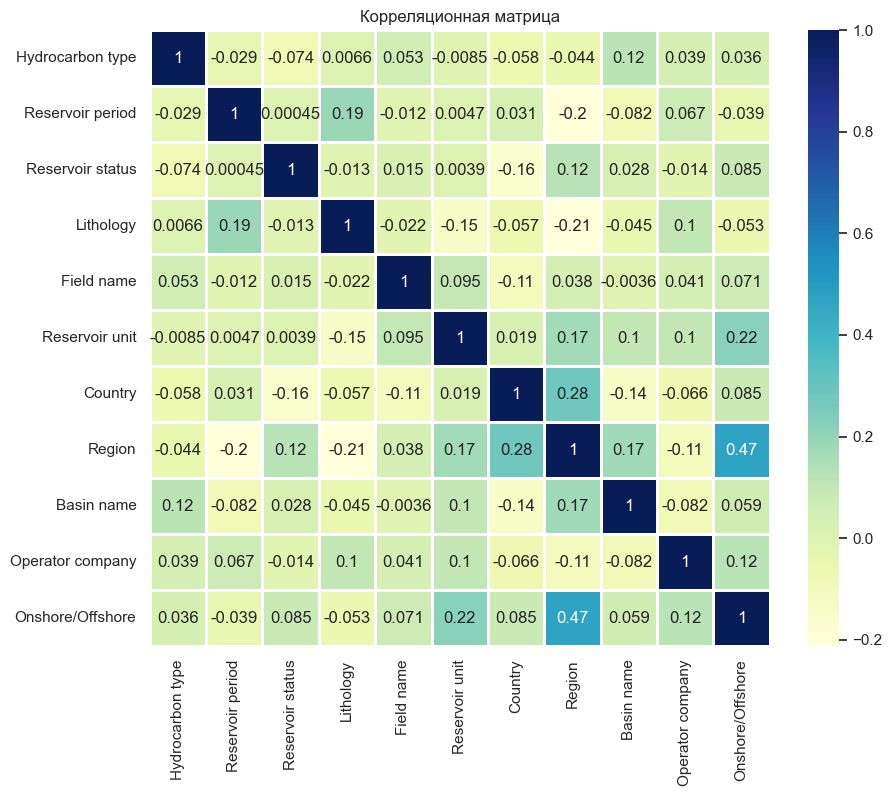

In [ ]:
correlation_matrix = train.corr()

selected_variables = ['Hydrocarbon type', 'Reservoir period', 'Reservoir status',
                      'Lithology', 'Field name', 'Reservoir unit',
                      'Country', 'Region', 'Basin name',
                      'Operator company', 'Onshore/Offshore']

correlation_subset = correlation_matrix.loc[selected_variables, selected_variables]

sns.set(rc={'figure.figsize': (10, 8)})
sns.heatmap(correlation_subset, annot=True, cmap="YlGnBu", linecolor='white', linewidths=1)

plt.title('Корреляционная матрица')
plt.show()

Корреляция с признаками достаточно слабая, наибольшая у признака Region. Удалим признаки с самой низкой корреляцией.

In [ ]:
train = train.drop(columns=['Hydrocarbon type', 'Reservoir status', 'Lithology',
                            'Country', 'Basin name', 'Tectonic_regime_REACTIVATION',
                            'Reservoir period'])

train.head()

,Field name,Reservoir unit,Region,Latitude,Longitude,Operator company,Onshore/Offshore,Depth,Thickness (gross average ft),Thickness (net pay average ft),...,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE MARGIN,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH
0,250.0,119.0,3.0,51.0000,44.8042,68.0,1,1870,262.0,33.0,...,1,0,0,0,0,0,0,0,0,0
1,121.0,96.0,4.0,-19.6017,-39.8332,80.0,1,4843,2133.0,72.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,14.0,5.0,26.0800,49.8100,93.0,1,6050,250.0,184.0,...,1,0,0,0,0,0,0,0,0,0
3,150.0,34.0,1.0,61.3833,1.7500,30.0,0,8988,425.0,300.0,...,0,0,0,0,1,0,0,0,0,0
4,233.0,132.0,6.0,53.2287,-115.8008,70.0,1,9306,233.0,167.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
test = test.drop(columns=['Hydrocarbon type', 'Reservoir status', 'Lithology',
                            'Country', 'Basin name',
                            'Reservoir period'])

test.head()

,Field name,Reservoir unit,Region,Latitude,Longitude,Operator company,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,...,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE MARGIN,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH
0,0.0,9.0,0.0,29.7422,28.4925,22.0,10282,745.0,144.0,10.0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,2.0,0.0,31.4382,31.3616,25.0,10499,509.0,410.0,20.0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,52.0,3.0,48.4740,57.6667,27.0,6000,300.0,105.0,10.0,...,1,0,0,0,0,0,1,0,0,0
3,3.0,19.0,1.0,60.7833,1.7333,73.0,9790,886.0,344.0,17.0,...,0,0,0,0,1,0,0,0,0,0
4,4.0,5.0,2.0,21.6000,72.9167,46.0,2950,670.0,0.0,21.0,...,0,0,0,0,1,0,0,0,0,1


Посмотрим на тренировочные и тестовые данные - что в итоге у нас получилось.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 0 to 308
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Field name                         268 non-null    float64
 1   Reservoir unit                     268 non-null    float64
 2   Region                             268 non-null    float64
 3   Latitude                           268 non-null    float64
 4   Longitude                          268 non-null    float64
 5   Operator company                   268 non-null    float64
 6   Onshore/Offshore                   268 non-null    int32  
 7   Depth                              268 non-null    int64  
 8   Thickness (gross average ft)       268 non-null    float64
 9   Thickness (net pay average ft)     268 non-null    float64
 10  Porosity                           268 non-null    float64
 11  Permeability                       268 non-null    float64
 12 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Field name                         133 non-null    float64
 1   Reservoir unit                     133 non-null    float64
 2   Region                             117 non-null    float64
 3   Latitude                           120 non-null    float64
 4   Longitude                          117 non-null    float64
 5   Operator company                   133 non-null    float64
 6   Depth                              133 non-null    int64  
 7   Thickness (gross average ft)       133 non-null    float64
 8   Thickness (net pay average ft)     133 non-null    float64
 9   Porosity                           133 non-null    float64
 10  Permeability                       133 non-null    float64
 11  Tectonic_regime_BASEMENT-I         133 non-null    int64  

In [ ]:
print(set(train.columns) - set(test.columns))  # Признаки, отсутствующие в тестовом наборе
print(set(test.columns) - set(train.columns))  # Новые признаки в тестовом наборе

{'Onshore/Offshore'}
set()


Как уже было отмечено выше, в целевой переменной мы наблюдаем дисбаланс, для устранения применим метод SMOTE.

In [ ]:
train['Onshore/Offshore'].value_counts()

Onshore/Offshore
1    187
0     77
2      4
Name: count, dtype: int64

In [ ]:
X = train.drop(columns=['Onshore/Offshore'])
y = train['Onshore/Offshore']

os = SMOTE(random_state=0, k_neighbors=2)

columns = X.columns

os_data_X, os_data_y = os.fit_resample(X, y)


os_data_X = pd.DataFrame(os_data_X, columns = columns)
os_data_y = pd.DataFrame(os_data_y, columns = ['Onshore/Offshore'])

print(f'Features shape after SMOTE: {os_data_X.shape}')
print(f'Classes distribution after SMOTE:\n{os_data_y.value_counts()}')

Features shape after SMOTE: (561, 39)
Classes distribution after SMOTE:
Onshore/Offshore
0                   187
1                   187
2                   187
Name: count, dtype: int64


Применим также стандартизацию данных.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train)
train_sc = pd.DataFrame(scaled_data, columns=train.columns)

## Обучение модели

Проведем разбиение выборки на тренировочную и тестовую.

In [ ]:
X = train.drop(columns=['Onshore/Offshore'])
y = train['Onshore/Offshore']

# Разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print(f'X train shape: {X_train.shape}, y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}, y test shape: {y_test.shape}')

X train shape: (214, 39), y train shape: (214,)
X test shape: (54, 39), y test shape: (54,)


Произведем обучение четырех моделей - Дерево решений, алгоритм K-ближайших соседей, Случайный лес, Метод опорных векторов.

In [ ]:
# Создаем модели
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(5)
rf = RandomForestClassifier(n_estimators=40, criterion='gini', random_state=42)
svm = SVC()

# Обучение моделей
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Предсказание ответов для тестовой выборки
y_pred_tree = tree.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

print(f'Accuracy tree: {accuracy_score(y_test, y_pred_tree)}')
print(f'Accuracy knn: {accuracy_score(y_test, y_pred_knn)}')
print(f'Accuracy rf: {accuracy_score(y_test, y_pred_rf)}')
print(f'Accuracy svm: {accuracy_score(y_test, y_pred_svm)}')

Accuracy tree: 0.7962962962962963
Accuracy knn: 0.7222222222222222
Accuracy rf: 0.8333333333333334
Accuracy svm: 0.7407407407407407


Лучший результат мы видим у алгоритма Случайный лес.

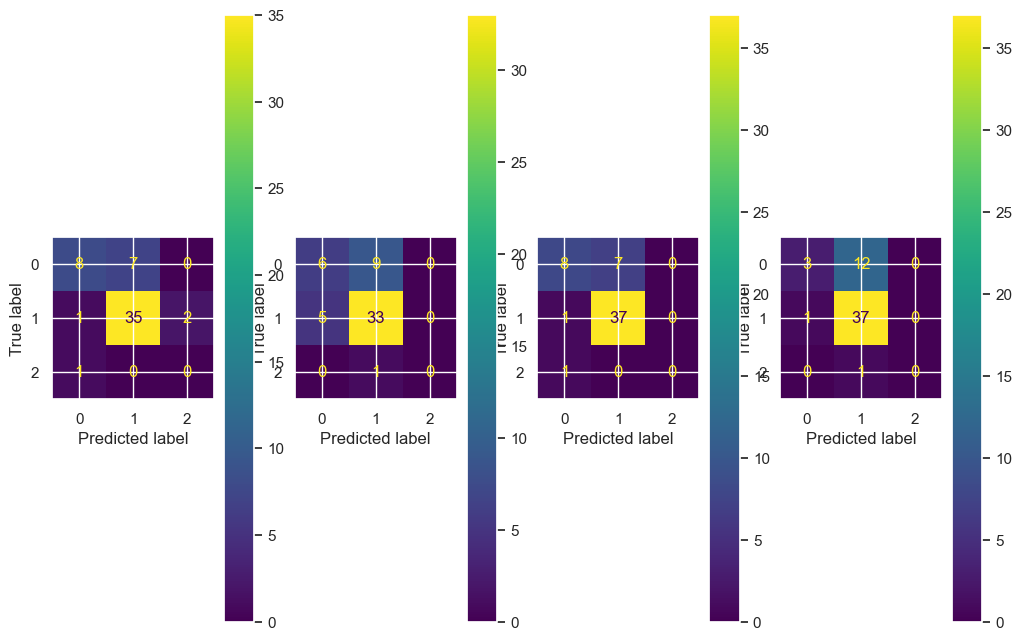

In [ ]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

fig, axes = plt.subplots(1, 4, figsize=(12,8), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix_tree, display_labels=tree.classes_)
display.plot(ax=axes[0])

display = ConfusionMatrixDisplay(conf_matrix_knn, display_labels=knn.classes_)
display.plot(ax=axes[1])

display = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=rf.classes_)
display.plot(ax=axes[2])

display = ConfusionMatrixDisplay(conf_matrix_svm, display_labels=svm.classes_)
display.plot(ax=axes[3])

In [ ]:
for i in range(1, 21):
    estimators = i * 10
    rf_i = RandomForestClassifier(n_estimators=estimators, criterion='gini', random_state=42)
    rf_i.fit(X_train, y_train)
    y_pred_rf_i = rf_i.predict(X_test)
    print(f'Accuracy rf with {estimators} estimators: {accuracy_score(y_test, y_pred_rf_i)}')

Accuracy rf with 10 estimators: 0.8148148148148148
Accuracy rf with 20 estimators: 0.8148148148148148
Accuracy rf with 30 estimators: 0.8518518518518519
Accuracy rf with 40 estimators: 0.8333333333333334
Accuracy rf with 50 estimators: 0.8333333333333334
Accuracy rf with 60 estimators: 0.8333333333333334
Accuracy rf with 70 estimators: 0.8333333333333334
Accuracy rf with 80 estimators: 0.8333333333333334
Accuracy rf with 90 estimators: 0.8333333333333334
Accuracy rf with 100 estimators: 0.8333333333333334
Accuracy rf with 110 estimators: 0.8333333333333334
Accuracy rf with 120 estimators: 0.8333333333333334
Accuracy rf with 130 estimators: 0.8333333333333334
Accuracy rf with 140 estimators: 0.8333333333333334
Accuracy rf with 150 estimators: 0.8518518518518519
Accuracy rf with 160 estimators: 0.8518518518518519
Accuracy rf with 170 estimators: 0.8518518518518519
Accuracy rf with 180 estimators: 0.8518518518518519
Accuracy rf with 190 estimators: 0.8518518518518519
Accuracy rf with 200 

При подборе параметра n_estimator мы видим лучший результат при значении 30, в модели было использовано значение 40, так как при данном значении результат на Kaggle лучше.

In [ ]:
y_test_pred = rf.predict(test)
ans_df = pd.DataFrame(y_test_pred, columns=['Onshore/Offshore '])

ans_df.reset_index(inplace=True)
ans_df.to_csv('submition_.csv', index=False)

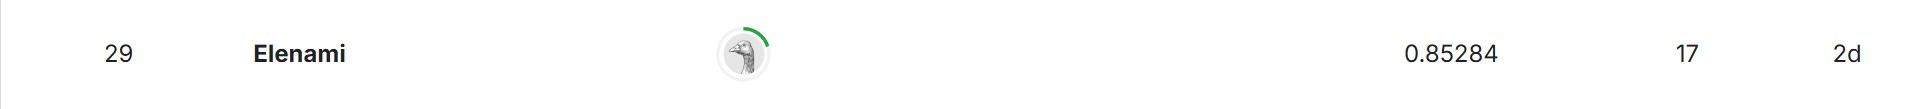

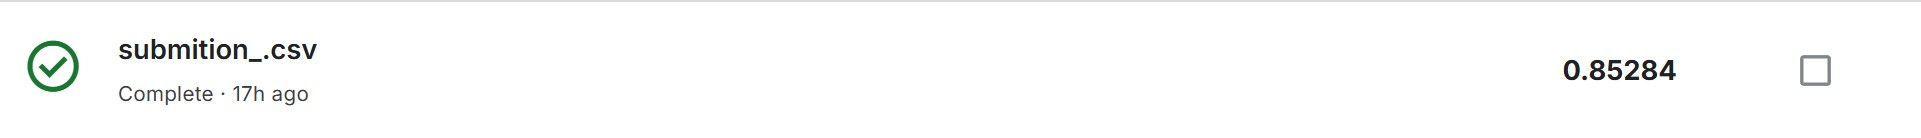